In [1]:
import pandas as pd

test_sample = pd.read_csv('under-sample.csv')

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np


In [14]:
# Create df with numerical user data
user_data = test_sample[['cool', 'stars', 'funny', 'useful', 'average_user_stars', 'submitted_reviews']]

# Drop nas
user_data.dropna(inplace=True)

C:\Users\sofia\AppData\Local\Temp\ipykernel_15192\683172994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data.dropna(inplace=True)


  0%|          | 0/9 [00:00<?, ?it/s]c:\Users\sofia\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 11%|█         | 1/9 [00:02<00:17,  2.23s/it]c:\Users\sofia\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 22%|██▏       | 2/9 [00:04<00:16,  2.42s/it]c:\Users\sofia\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_ini

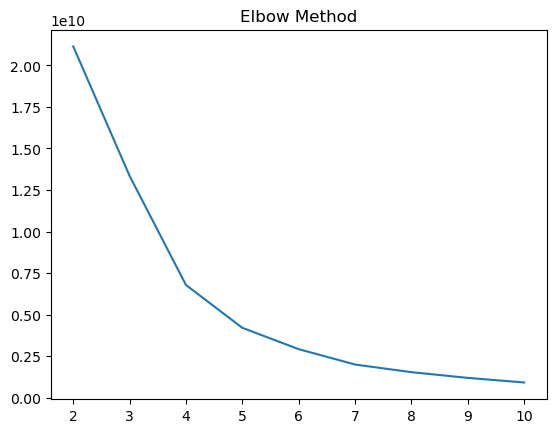

In [15]:
# Elbow plot

inertias = []
ks = range(2, 11)

for k_ in tqdm(ks):
  kmeans_result = (KMeans(n_clusters=k_, random_state = 20).fit(user_data))
  inertias.append(kmeans_result.inertia_)

plt.plot(ks, inertias, label = 'inertia')
plt.xticks(ks)
plt.title('Elbow Method')
plt.show()

In [17]:
# Standardize data
sc = StandardScaler()
scaled_user_data = pd.DataFrame(sc.fit_transform(user_data), columns=user_data.columns)

# K Means Clustering
num_cluster = 4
kmeans_result = KMeans(num_cluster, init='random').fit(scaled_user_data)

# Assign each point to its cluster
user_data['cluster_labels'] = kmeans_result.labels_

c:\Users\sofia\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sofia\AppData\Local\Temp\ipykernel_15192\1060593722.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['cluster_labels'] = kmeans_result.labels_


In [19]:
# PCA with 3 components
pca = PCA(3).fit(scaled_user_data)

In [25]:
# Explained variance
pca.explained_variance_ratio_


array([0.35969796, 0.33286007, 0.12640421])

In [27]:
# Scree plot
px.line(x = ['PC1', 'PC2', 'PC3'], y=np.cumsum(pca.explained_variance_ratio_))

In [29]:
# pca with 3 components 
pca_3 = PCA(n_components=3)
pca_data = pca_3.fit_transform(scaled_user_data)

# K-means with pca
num_clusters = 4
kmeans_pca = KMeans(n_clusters=num_clusters, init='random', random_state=20).fit(pca_data)

c:\Users\sofia\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



634723.0575592899